In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
# read and scale down image
# wget https://bigsnarf.files.wordpress.com/2017/05/hammer.png

In [2]:
img = cv2.pyrDown(cv2.imread('hammer.png', cv2.IMREAD_UNCHANGED))

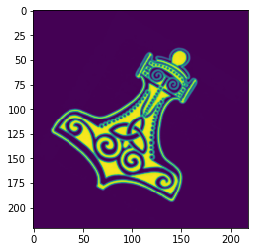

In [3]:
plt.imshow(img)

In [4]:
# threshold image
ret, threshed_img = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),127, 255, cv2.THRESH_BINARY)
# find contours and get the external one
image, contours, hier = cv2.findContours(threshed_img, cv2.RETR_TREE,
                cv2.CHAIN_APPROX_SIMPLE)


error: OpenCV(3.4.3) c:\projects\opencv-python\opencv\modules\imgproc\src\color.hpp:255: error: (-2:Unspecified error) in function '__cdecl cv::CvtHelper<struct cv::Set<3,4,-1>,struct cv::Set<1,-1,-1>,struct cv::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [ ]:
# with each contour, draw boundingRect in green
# a minAreaRect in red and
# a minEnclosingCircle in blue
for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    # draw a green rectangle to visualize the bounding rect
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
 
    # get the min area rect
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    # convert all coordinates floating point values to int
    box = np.int0(box)
    # draw a red 'nghien' rectangle
    cv2.drawContours(img, [box], 0, (0, 0, 255))
 
  

In [ ]:
 # finally, get the min enclosing circle
    (x, y), radius = cv2.minEnclosingCircle(c)
    # convert all values to int
    center = (int(x), int(y))
    radius = int(radius)
    # and draw the circle in blue
    img = cv2.circle(img, center, radius, (255, 0, 0), 2)
 

In [ ]:
 
print(len(contours))
cv2.drawContours(img, contours, -1, (255, 255, 0), 1)


In [ ]:
cv2.imshow("contours", img)
 
ESC = 27
while True:
    keycode = cv2.waitKey()
    if keycode != -1:
        keycode &amp;= 0xFF
        if keycode == ESC:
            break
cv2.destroyAllWindows()